In [1]:
import cellrank as cr
import scanpy as sc
import seaborn as sns
from scipy.stats.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

In [2]:
adata = sc.read_h5ad("dt_out/2_invitro_analysis/BMP4_SC_filtered_feature_bc_matrix_scvelo_preprocessed_16Feb2025.h5ad")

In [10]:
# sc.pp.neighbors(adata)

In [11]:
# sc.tl.umap(adata, random_state = 0)

In [3]:
vk = cr.kernels.VelocityKernel(adata)

In [4]:
vk.compute_transition_matrix()

python(29283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.909 [00:00<?, ?cell/s]
100%|███████████████████████████████████████████████████████████████████████████| 8909/8909 [00:49<00:00, 179.29cell/s]
python(29312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.909 [00:00<?, ?cell/s]
100%|███████████████████████████████████████████████████████████████████████████| 8909/8909 [00:43<00:00, 205.51cell/s]


VelocityKernel[n=8909, model='deterministic', similarity='correlation', softmax_scale=3.858]

In [5]:
ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()

ConnectivityKernel[n=8909, dnorm=True, key='connectivities']

In [6]:
combined_kernel = 0.8 * vk + 0.2 * ck

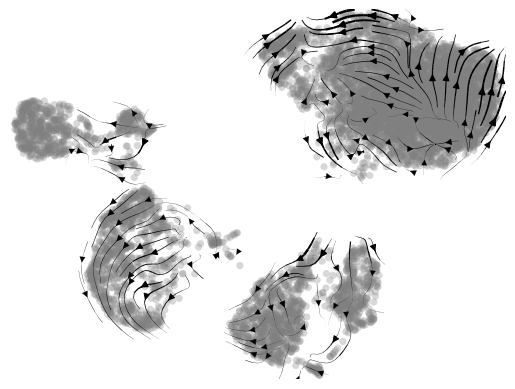

In [7]:
vk.plot_projection()

In [8]:
from cellrank.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

GPCCA[kernel=(0.8 * VelocityKernel[n=8909] + 0.2 * ConnectivityKernel[n=8909]), initial_states=None, terminal_states=None]


/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


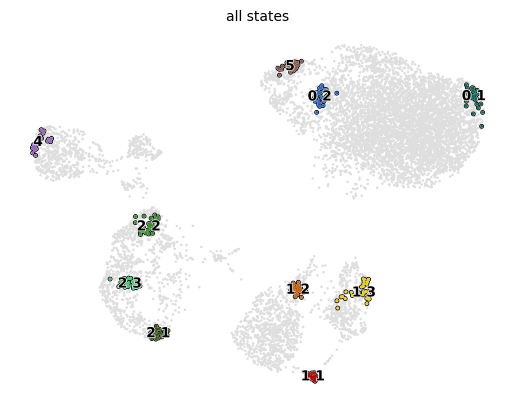

In [9]:
g.fit(n_states=10, cluster_key="leiden_01")
g.plot_macrostates(which="all")

/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


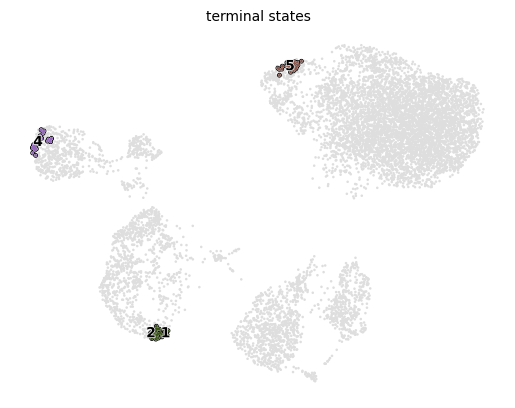

In [10]:
g.predict_terminal_states(method="top_n", n_states=3)
g.plot_macrostates(which="terminal")

Defaulting to `'gmres'` solver.


python(30411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.  | 0/3 [00:00<?, ?/s]
100%|██████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.49/s]
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


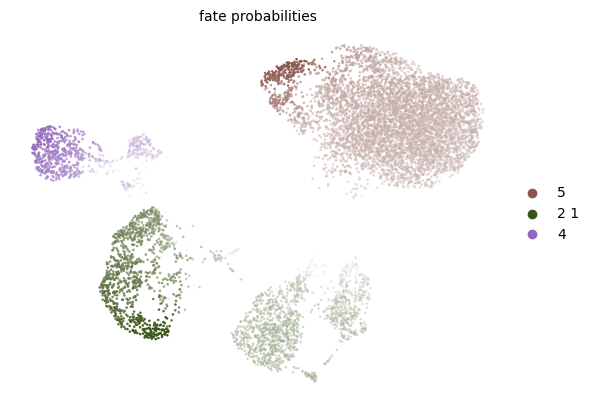

In [11]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(legend_loc="right")

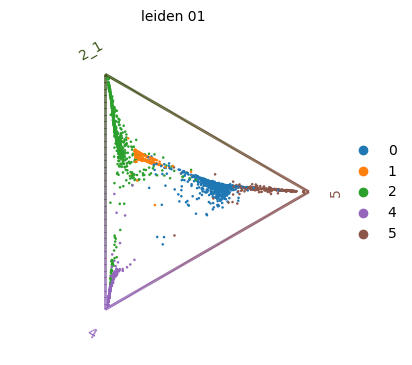

In [12]:
cr.pl.circular_projection(adata, keys="leiden_01", legend_loc="right")

In [13]:
sc_drivers = g.compute_lineage_drivers(lineages="4")
sc_drivers.head(10)

,4_corr,4_pval,4_qval,4_ci_low,4_ci_high
Mag,0.949271,0.0,0.0,0.947176,0.951285
Plp1,0.945635,0.0,0.0,0.943395,0.947789
Cldn11,0.937828,0.0,0.0,0.935276,0.940282
Pllp,0.935045,0.0,0.0,0.932384,0.937606
Mobp,0.931899,0.0,0.0,0.929113,0.934579
Ptgds,0.930714,0.0,0.0,0.927881,0.933439
Ugt8,0.929658,0.0,0.0,0.926784,0.932423
Klk6,0.925553,0.0,0.0,0.922518,0.928474
Ttll7,0.924393,0.0,0.0,0.921313,0.927358
Apod,0.922722,0.0,0.0,0.919577,0.925750


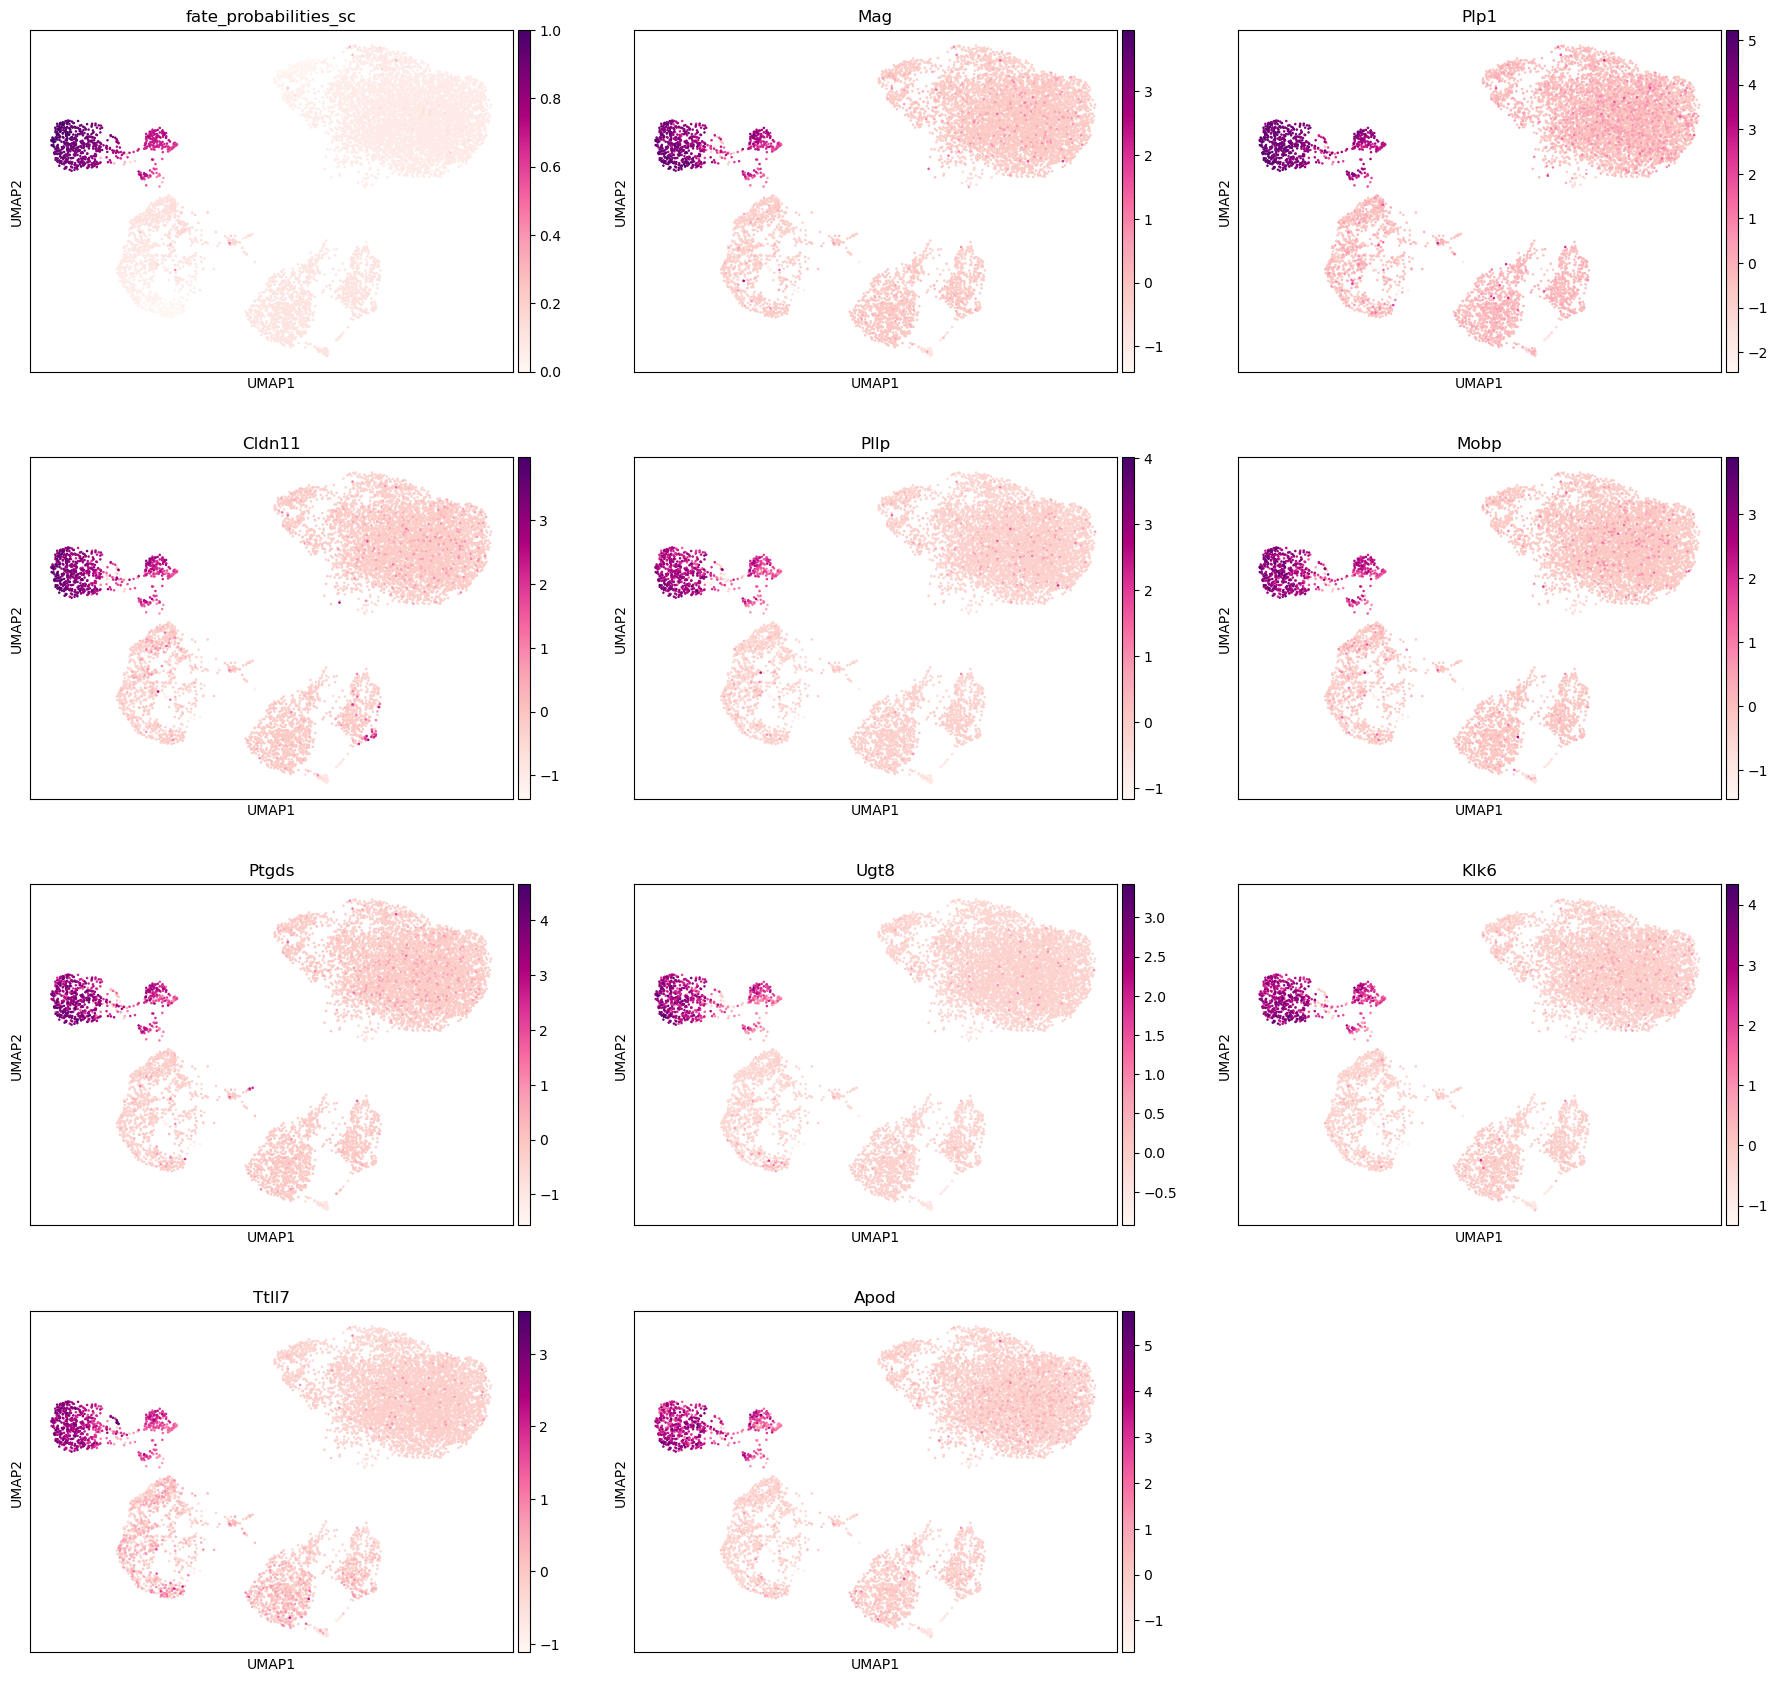

In [14]:
adata.obs["fate_probabilities_sc"] = g.fate_probabilities["4"].X.flatten()
sc.pl.embedding(
    adata,
    basis="umap",
    color=["fate_probabilities_sc"] + list(sc_drivers.index[:10]),
    color_map="RdPu",
    # s=50,
    ncols=3,
)

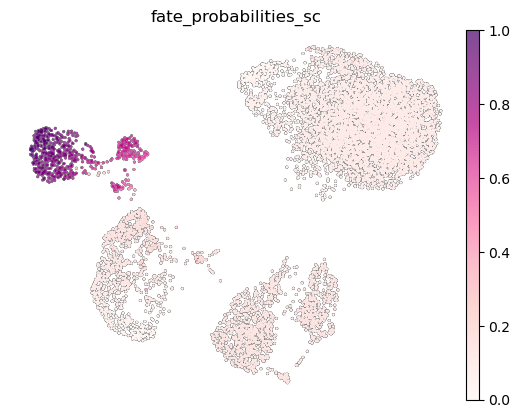

In [15]:
sc.pl.umap(
    adata,
    color=["fate_probabilities_sc"],
    color_map="RdPu",
    frameon=False,
    add_outline = True,
    outline_width = (0.1, 0.001),
    save="_invitro_BMP_cellrank_fate_probabilities_sc.pdf"
)

In [16]:
adata.write("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank.h5ad")

In [19]:
adata.obs.to_csv("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank_obs.csv")


In [18]:
sc_drivers.to_csv("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank_SC_driver_genes.csv")

Check Sox10 and Olig2

In [2]:
adata = sc.read_h5ad("dt_out/2_invitro_analysis/invitro_BMP4_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations_fulldataset_scVelo_cellrank.h5ad")

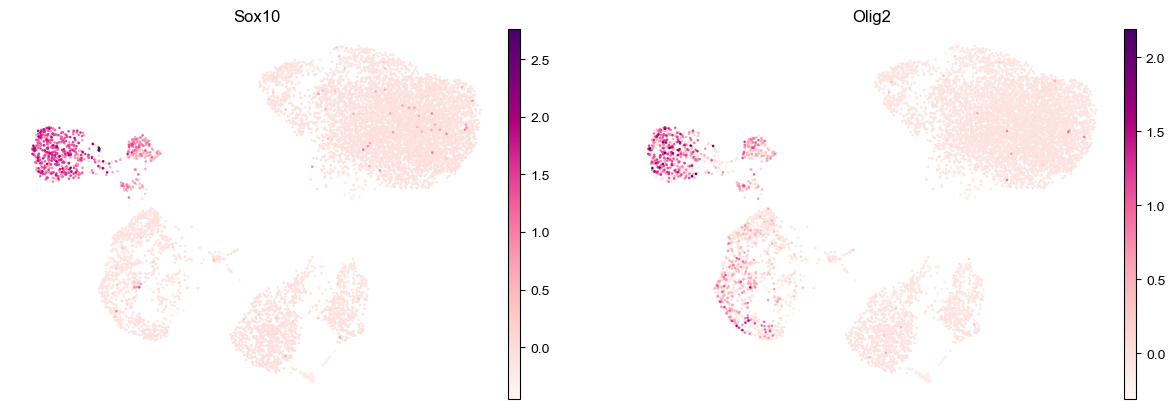

In [3]:
sc.pl.embedding(
    adata,
    basis="umap",
    color=["Sox10","Olig2"] ,
    color_map="RdPu",
    frameon=False,
    # s=50,
    ncols=2,
    save = "_invitro_BMP_Sox10_Olig2_expression_by_cluster.pdf"
)

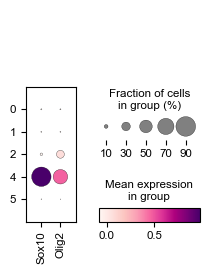

In [5]:
sc.pl.dotplot(
    adata,
    var_names=["Sox10","Olig2"] ,
    groupby="leiden_01",
    color_map="RdPu",
    save = "invitro_BMP_Sox10_Olig2_expression_by_cluster.pdf"
)

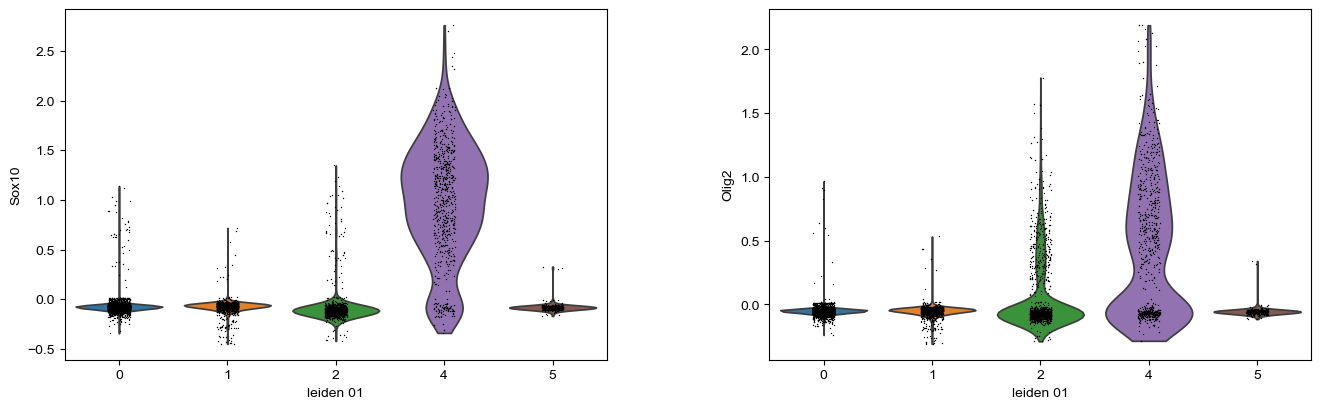

In [16]:
sc.pl.violin(
    adata,
    keys=["Sox10","Olig2"] ,
    groupby="leiden_01",
    cmap="RdPu",
    save = "invitro_BMP_Sox10_Olig2_expression_by_cluster.pdf"
)

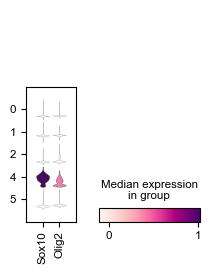

In [17]:
sc.pl.stacked_violin(
    adata,
    var_names=["Sox10","Olig2"] ,
    groupby="leiden_01",
    cmap="RdPu",
    # palette = "tab20b",
    save = "invitro_BMP_Sox10_Olig2_expression_by_cluster.pdf"
)

In [8]:
np.sum(adata.obs['leiden_01']=="4")/(len(adata.obs))

679

In [9]:
(len(adata.obs))

8909

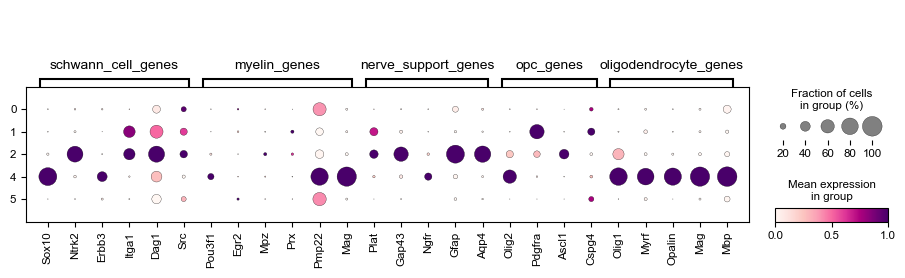

In [8]:

schwann_cell_genes = ["Sox10", "Ntrk2", "Erbb3", "Itga1", "Dag1", "Src"]

myelin_genes = ["Pou3f1", "Egr2", "Mpz", "Prx", "Pmp22", "Mag"]

nerve_support_genes = ["Plat", "Gap43", "Ngfr", "Gfap", "Aqp4"]

opc_genes = ["Olig2", "Pdgfra", "Ascl1", "Cspg4"]

oligodendrocyte_genes = ["Olig1", "Myrf", "Opalin", "Mag", "Mbp"]

marker_genes = {
    "schwann_cell_genes": schwann_cell_genes,
    "myelin_genes": myelin_genes,
    "nerve_support_genes": nerve_support_genes,
    "opc_genes": opc_genes,
    "oligodendrocyte_genes": oligodendrocyte_genes,

}
sc.pl.dotplot(adata, marker_genes, groupby="leiden_01", standard_scale="var",var_group_rotation = 0,cmap = "RdPu", save="BMP_cc_myelin_nerve_sc_opc_genes_v2.pdf")